# ALeRCE basics

```Author: Alejandra Muñoz-Arancibia. Last updated: 20251015```

Very simple examples on how to interact with the ALeRCE client https://alerce.readthedocs.io/en/latest/index.html, which can be installed with pip. See https://alerce.readthedocs.io/en/latest/apis.html for the API documentation.

For more information about the ALeRCE broker, please visit http://alerce.science/, or read our publications:
* The Automatic Learning for the Rapid Classification of Events (ALeRCE) Alert Broker, [Förster et al. 2021, AJ, 161, 242](https://arxiv.org/abs/2008.03303)
* Alert Classification for the ALeRCE Broker System: The Real-time Stamp Classifier, [Carrasco-Davis et al. 2021, AJ, 162, 231](https://arxiv.org/abs/2008.03309)
* Alert Classification for the ALeRCE Broker System: The Light Curve Classifier, [Sánchez-Sáez et al. 2021, AJ, 161, 141](https://arxiv.org/abs/2008.03311)

*It is highly recommended that you try this notebook in Google Colab using the following [link](https://colab.research.google.com/github/alercebroker/usecases/blob/master/notebooks/SOCHIAS_XX_Oct2025_tutorial/ALeRCE_Basics_SOCHIAS.ipynb).* This will avoid you from having to sort out library installation problems and focus on the contents of the tutorial. You can try installing the dependencies later in your own system.

Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from IPython.core.display import HTML

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)

In [2]:
#!pip install alerce

In [3]:
from alerce.core import Alerce

# Initialize alerce api object

Let's start the ALeRCE client

In [4]:
client = Alerce()

We will explore different methods from the client:

* Query global properties of an individual object
* Query properties per band of an individual object
* Query detections of an individual object
* Query image stamps
* Crossmatch with objects in the vicinity
* Query non detections of an individual object
* Query features of an individual object
* Query probabilities of an individual object
* Query global properties of a group of objects

# Query properties for an individual object

We will now query the global properties of one object based on a given object id, ZTF25abansec in this case. You can see this object in the website https://alerce.online/object/ZTF25abansec.

In [5]:
oid = "ZTF25abansec"
query_results = client.query_objects(
    oid=oid,
    format='pandas'
)
properties = query_results # save for later
query_results

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,g_r_mean,g_r_mean_corr,firstmjd,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF25abansec,74,5561,58431.171181,60921.178912,False,False,103,None,None,None,None,60865.260544,60921.178912,55.918368,279.675753,37.048353,0.008936,0.007132,None,None,None,27.5.6


The columns are described in here https://alerce.readthedocs.io/en/latest/models.html

# Query properties per band for an indivual object

In [6]:
query_results = client.query_magstats(
    oid=oid,
    format='pandas'
)
query_results

,fid,stellar,corrected,ndet,ndubious,magmean,magmedian,magmax,magmin,magsigma,maglast,magfirst,firstmjd,lastmjd,step_id_corr
0,1,False,False,55,0,18.354134,18.210037,19.856400,17.377064,0.731732,19.592247,19.235132,60865.260,60921.180,27.5.6
1,2,False,False,48,22,17.498535,17.537512,18.653774,16.872883,0.454666,18.653774,18.014395,60867.277,60919.203,27.5.6


You can see that the results are different statistics in two rows, one per band. The columns are described in here https://alerce.readthedocs.io/en/latest/models.html

# Query detections, non-detections and forced photometry epochs for an individual object

Now we obtain a list of all the detections, non-detections (limiting magnitude) and forced photometry epochs in two bands. Note that ALeRCE started to ingest forced photometry on December 2023, so objects that stopped having detections before that time give an empty dataframe of forced photometry.

Also note that all dataframes include a unique identifier for the telescope (`tid`), which hints at the multi-stream nature of ALeRCE (soon to be available).

In [7]:
obj_dets = client.query_detections(oid, format='pandas')
obj_dets = obj_dets.sort_values("mjd")

obj_nondets = client.query_non_detections(oid, format='pandas')
obj_nondets = obj_nondets.sort_values("mjd")

obj_fp = client.query_forced_photometry(oid, format='pandas')
if len(obj_fp) > 0:
    obj_fp = obj_fp.sort_values("mjd")

Note that when LSST starts its public stream, we will use an updated ALeRCE client version. The queries will change a little:

In [8]:
## Uncomment the following lines after the LSST stream starts
## Will work for an updated ALeRCE client version

#obj_dets = client.query_detections(oid, survey='ztf', format='pandas')
#obj_dets = obj_dets.sort_values("mjd")
#
#obj_nondets = client.query_non_detections(oid, survey='ztf', format='pandas')
#obj_nondets = obj_nondets.sort_values("mjd")
#
#obj_fp = client.query_forced_photometry(oid, survey='ztf', format='pandas')
#if len(obj_fp) > 0:
#    obj_fp = obj_fp.sort_values("mjd")

Let's see the contents of these tables

In [9]:
display(obj_dets)

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,magap,sigmapsf,sigmagap,ra,dec,rb,rbversion,drb,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,step_id_corr,phase,parent_candid,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
0,ztf,60865.260544,3111260546015015001,1,3111260546015,19.906770,1,3111,2.240241,19.235132,18.9577,0.132558,0.1764,279.675715,37.048398,0.772857,t17_f5_c3,0.999124,18.8737,0.2058,684120160.0,True,False,False,27.5.6,0.0,NaN,NaN,NaN,NaN
1,ztf,60867.276863,3113276860715015009,2,3113276860715,20.050188,1,3113,2.507732,18.014395,18.1461,0.080080,0.0849,279.675737,37.048378,0.714286,t17_f5_c3,0.999665,18.0617,0.0961,726120207.0,True,False,False,27.5.6,0.0,NaN,NaN,NaN,NaN
2,ztf,60867.276863,3113276860715025009,2,3113276860715,20.050200,1,3113,2.507730,18.014400,18.1461,0.080080,0.0849,279.675737,37.048378,0.714286,t17_f5_c3,NaN,18.0617,0.0961,NaN,False,False,False,27.5.6,0.0,3.143237e+18,NaN,NaN,NaN
3,ztf,60867.277407,3113277406015015000,2,3113277406015,20.038403,1,3113,1.328118,18.011831,18.1406,0.067473,0.0900,279.675754,37.048362,0.768571,t17_f5_c3,0.996253,18.2142,0.1178,684120260.0,True,True,True,27.5.6,0.0,NaN,16.818190,100.0,0.022474
4,ztf,60867.343819,3113343816015015000,1,3113343816015,19.749186,1,3113,2.123990,18.519320,18.5784,0.103419,0.1403,279.675769,37.048336,0.914286,t17_f5_c3,0.996875,18.6589,0.1910,684120160.0,True,False,False,27.5.6,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,ztf,60910.305023,3156305026015015001,2,3156305026015,20.311400,1,3156,1.337920,18.267700,18.1283,0.087084,0.0801,279.675761,37.048353,0.697143,t17_f5_c3,NaN,18.0568,0.0895,NaN,False,True,True,27.5.6,0.0,3.167179e+18,16.896902,100.0,0.024639
99,ztf,60914.210845,3160210846015015000,2,3160210846015,20.781937,1,3160,1.281801,18.501610,18.6862,0.101026,0.1081,279.675741,37.048366,0.761429,t17_f5_c3,0.955733,18.6267,0.1195,684120260.0,True,True,True,27.5.6,0.0,NaN,16.958134,100.0,0.024380
100,ztf,60917.211076,3163211076015015001,2,3163211076015,20.566599,1,3163,1.443469,18.570757,18.9032,0.125715,0.1421,279.675796,37.048335,0.617143,t17_f5_c3,0.962248,18.8605,0.1622,684120260.0,True,False,False,27.5.6,0.0,NaN,NaN,NaN,NaN
101,ztf,60919.201447,3165201446015015000,2,3165201446015,20.537264,1,3165,1.478121,18.653774,18.8601,0.112439,0.1373,279.675806,37.048345,0.751429,t17_f5_c3,0.977683,18.9180,0.1719,684120260.0,True,False,False,27.5.6,0.0,NaN,NaN,NaN,NaN


In [10]:
display(obj_nondets)

,tid,mjd,fid,diffmaglim
0,ztf,60836.359734,2,19.8631
1,ztf,60836.429792,1,19.6831
2,ztf,60838.357593,2,19.9399
3,ztf,60838.378773,2,19.2741
4,ztf,60838.422535,1,19.7213
...,...,...,...,...
70,ztf,60917.268819,1,20.6443
71,ztf,60919.163183,1,20.2628
72,ztf,60919.200486,2,20.4268
73,ztf,60919.312465,1,20.3748


In [11]:
display(obj_fp)

,candid,tid,pid,oid,mjd,fid,ra,e_ra,dec,e_dec,mag,e_mag,mag_corr,e_mag_corr,e_mag_corr_ext,isdiffpos,corrected,dubious,parent_candid,has_stamp,scibckgnd,exptime,magnr,scisigpix,adpctdif1,sigmagnr,magzpsci,adpctdif2,chinr,diffmaglim,programid,sharpnr,field,magzpsciunc,procstatus,rcid,magzpscirms,distnr,rfid,clrcoeff,ranr,sciinpseeing,clrcounc,decnr
82,ZTF25abansec3084378776015,ztf,3084378776015,ZTF25abansec,60838.378773,2,279.675715,None,37.048398,None,22.922562,4.360516,17.252128,100.0,0.023516,1,True,False,3111260546015015001,False,136.873001,30.0,17.257999,13.82780,0.058403,0.109,25.966700,0.075399,6.787,19.274099,1,0.549,684,2.503800e-06,0,60,0.021481,1.225562,684120260,0.075347,279.675293,2.2839,0.000008,37.048374
71,ZTF25abansec3084423000715,ztf,3084423000715,ZTF25abansec,60838.423009,1,279.675758,None,37.048350,None,21.734627,0.915500,NaN,NaN,NaN,-1,False,True,3113344300715015013,False,94.219704,30.0,18.395000,13.86800,0.052569,0.083,26.320200,0.067838,6.419,19.623301,1,0.263,726,2.544200e-06,0,7,0.020545,2.229136,726120107,-0.057361,279.674988,2.2499,0.000009,37.048378
65,ZTF25abansec3086241330715,ztf,3086241330715,ZTF25abansec,60840.241331,1,279.675751,None,37.048368,None,23.203648,2.094131,NaN,NaN,NaN,1,False,False,3115280310715015006,False,92.709602,30.0,18.395000,8.97642,0.051883,0.083,26.299601,0.062555,6.419,20.173300,1,0.263,726,1.853700e-06,0,7,0.017506,2.207147,726120107,-0.070433,279.674988,2.1203,0.000006,37.048378
83,ZTF25abansec3086341850715,ztf,3086341850715,ZTF25abansec,60840.341852,2,279.675751,None,37.048368,None,21.966974,0.707477,NaN,NaN,NaN,1,False,False,3115280310715015006,False,311.173004,30.0,17.909000,9.32023,0.057341,0.102,26.253799,0.070704,5.790,20.237000,1,0.225,726,1.565900e-06,0,7,0.016207,3.772682,726120207,0.074709,279.677002,1.4884,0.000005,37.048683
72,ZTF25abansec3089264100715,ztf,3089264100715,ZTF25abansec,60843.264109,2,279.675751,None,37.048365,None,21.645630,0.385192,NaN,NaN,NaN,-1,False,True,3119239970715015019,False,316.683990,30.0,17.909000,7.30467,0.049480,0.102,26.265400,0.064952,5.790,20.486601,1,0.225,726,9.523000e-07,0,7,0.012586,3.776947,726120207,0.073921,279.677002,1.9122,0.000003,37.048683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,ZTF25abansec3151375266015,ztf,3151375266015,ZTF25abansec,60905.375266,1,279.675887,None,37.048281,None,19.523758,0.075878,NaN,NaN,NaN,1,False,False,3167178916015015000,False,84.992401,30.0,18.582001,6.84649,0.066706,0.084,26.124100,0.069765,4.796,20.417000,1,0.248,684,2.284800e-06,0,60,0.020907,3.027458,684120160,-0.030109,279.674866,2.0240,0.000008,37.048519
26,ZTF25abansec3154224210715,ztf,3154224210715,ZTF25abansec,60908.224213,2,279.675887,None,37.048281,None,18.232244,0.023036,NaN,NaN,NaN,1,False,False,3167178916015015000,False,306.989014,30.0,17.909000,6.26543,0.051244,0.102,26.252899,0.068209,5.790,20.507200,1,0.225,726,9.553000e-07,0,7,0.012652,3.519523,726120207,0.071473,279.677002,2.1124,0.000003,37.048683
25,ZTF25abansec3156217970715,ztf,3156217970715,ZTF25abansec,60910.217974,1,279.675887,None,37.048281,None,19.794607,0.066866,NaN,NaN,NaN,1,False,False,3167178916015015000,False,89.106003,30.0,18.395000,6.38985,0.047296,0.083,26.251900,0.061236,6.419,20.695400,1,0.263,726,1.590700e-06,0,7,0.016444,2.620558,726120107,-0.054785,279.674988,1.8167,0.000005,37.048378
24,ZTF25abansec3160282216015,ztf,3160282216015,ZTF25abansec,60914.282211,1,279.675887,None,37.048281,None,20.175356,0.120060,NaN,NaN,NaN,1,False,False,3167178916015015000,False,87.157600,30.0,18.582001,6.01272,0.057964,0.084,26.176100,0.066045,4.796,20.573200,1,0.248,684,2.052400e-06,0,60,0.019502,3.027458,684120160,-0.055684,279.674866,2.1247,0.000007,37.048519


The most important columns for the detections are the time (`mjd`), the unique detection identifier (`candid`), the band (`fid`), the difference magnitude (`magpsf`) and its error (`sigmapsf`). For forced photometry epochs, the difference magnitude and its error are `mag`) and `e_mag` respectively.

The columns for the non-detections are the time (`mjd`), the band (`fid`), and the limiting magnitude (`diffmaglim`).

All the columns are described in here https://alerce.readthedocs.io/en/latest/models.html.

We can now plot the light curve for this object

In [12]:
def plot_lc(oid, obj_dets, obj_nondets, obj_fp):
    fig, ax = plt.subplots(figsize = (10, 4))
    labels = {1: 'g', 2: 'r', 3: 'i'}
    markers = {1: 'o', 2: 's', 3: 'x'}
    sizes = {1: 20, 2: 30, 3: 25}

    # Color blind friendly green and red 
    colors = {1: '#56E03A', 2: '#D42F4B'} 
    
    for fid in [1, 2]:
        mask = obj_dets["fid"] == fid
        if np.sum(mask) > 0:
            ax.errorbar(obj_dets[mask]["mjd"], obj_dets[mask]["magpsf"],
                        yerr=obj_dets[mask]["sigmapsf"], c=colors[fid],
                        label=labels[fid], marker=markers[fid],
                        linestyle='None')
        
        mask = (obj_nondets["fid"] == fid) & (obj_nondets["diffmaglim"] > -900)
        if np.sum(mask) > 0:     
            ax.scatter(obj_nondets[mask]["mjd"], obj_nondets[mask]["diffmaglim"],
                       c=colors[fid], alpha=0.5, marker='v',
                       label="lim. mag. %s" % labels[fid], s=sizes[fid])

        if len(obj_fp) == 0:
            continue
        mask = (obj_fp["fid"] == fid) \
               & (obj_fp["mag"] / obj_fp["e_mag"] >= 3) \
               & (obj_fp["e_mag"] < 1.)
        if np.sum(mask) > 0:
            ax.errorbar(obj_fp[mask]["mjd"], obj_fp[mask]["mag"], 
                        yerr=obj_fp[mask]["e_mag"], c=colors[fid], marker=markers[fid],
                        alpha=0.5, label="forced phot. %s" % labels[fid],
                        linestyle='None')
            
    ax.set_title(oid, fontsize=15)
    ax.set_xlabel("MJD", fontsize=15)
    ax.set_ylabel("Difference magnitude", fontsize=15)
    ax.legend()
    ax.set_ylim(ax.get_ylim()[::-1])

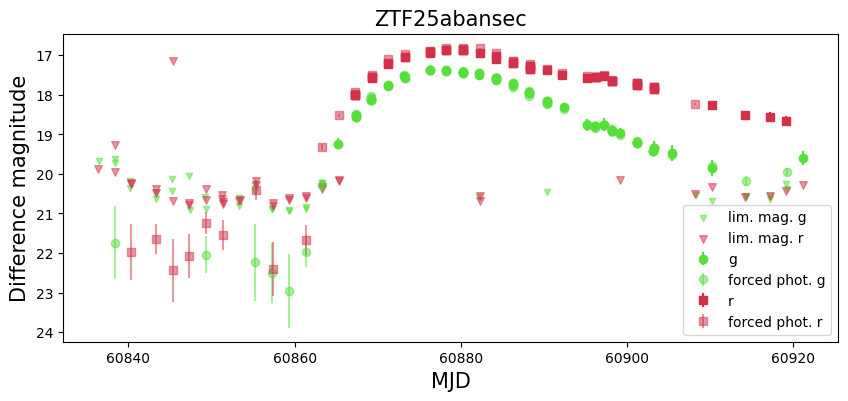

In [13]:
plot_lc(oid, obj_dets, obj_nondets, obj_fp)

# Query image stamps

We can also query the image stamps associated to a specific object and candid.

We will use the first candid from the previously queried detections.

In [14]:
stamps = client.get_stamps(oid, obj_dets.iloc[0]["candid"])
print(stamps)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fc20ec2c110>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fc20f8b1890>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fc20e8ecb50>]


The image stamps are a triplet of science, reference and difference images. Let's look at the first image:

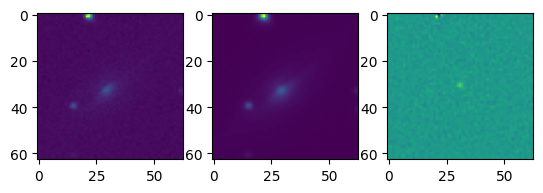

In [15]:
fig, ax = plt.subplots(ncols=3)
for i in range(3):
    ax[i].imshow(stamps[i].data)

We can also directly plot the images stamps using the plot_stamps command.

In [16]:
client.plot_stamps(oid, obj_dets.iloc[0]["candid"])

And when LSST starts, these queries will be:

In [17]:
## Uncomment the following lines after the LSST stream starts
## Will work for an updated ALeRCE client version

#stamps = client.get_stamps(oid, obj_dets.iloc[0]["candid"], survey='ztf')
#
#client.plot_stamps(oid, obj_dets.iloc[0]["candid"], survey='ztf')

# Query probabilities for an individual object

Similarly, we can query the classification probabilities for a given object. 

Note that an object can be classified by different classifiers with different versions, which is shown in the columns `classifier_name` and `classifier_version`, respectively.

In [18]:
oid

'ZTF25abansec'

In [19]:
query_results = client.query_probabilities(
    oid=oid,
    format='pandas'
)
query_results

,classifier_name,classifier_version,class_name,probability,ranking
0,lc_classifier,lc_classifier_1.1.13,SNIa,3.418440e-01,1
1,LC_classifier_ATAT_forced_phot(beta),1.0.0,SNIa,3.714632e-01,2
2,lc_classifier_BHRF_forced_phot,2.1.0,SNIa,5.788400e-01,1
3,lc_classifier_BHRF_forced_phot_periodic,2.1.0,LPV,1.000000e-01,6
4,lc_classifier_BHRF_forced_phot_stochastic,2.1.0,Microlensing,2.000000e-01,2
...,...,...,...,...,...
87,LC_classifier_ATAT_forced_phot(beta),1.0.0,RRLab,7.050051e-08,10
88,lc_classifier_BHRF_forced_phot,2.1.0,RRLc,0.000000e+00,19
89,LC_classifier_ATAT_forced_phot(beta),1.0.0,RRLc,5.381826e-10,17
90,lc_classifier_BHRF_forced_phot,2.1.0,DSCT,0.000000e+00,13


We see that we get many rows for a single object. This shows all the probabilities associated to all the ALeRCE classifiers and the classes in their associated taxonomies. The columns indicate the name of the classifier (`classifier_name`), its version (`classifier_version`), the class (`class_name`), the probability (`probability`) and the ranking (`ranking`) growing from most to least likely. 

Let's check the unique classifier versions associated to each classifier:

In [20]:
for clf in query_results.classifier_name.unique():
    mask = query_results.classifier_name == clf
    print(clf, query_results.loc[mask].classifier_version.unique())

lc_classifier ['lc_classifier_1.1.13']
LC_classifier_ATAT_forced_phot(beta) ['1.0.0']
lc_classifier_BHRF_forced_phot ['2.1.0']
lc_classifier_BHRF_forced_phot_periodic ['2.1.0']
lc_classifier_BHRF_forced_phot_stochastic ['2.1.0']
lc_classifier_BHRF_forced_phot_top ['2.1.0']
lc_classifier_BHRF_forced_phot_transient ['2.1.0']
stamp_classifier ['stamp_classifier_1.0.4']
stamp_classifier_2025_beta ['2.1.1_beta']


And now the unique classes associated to each classifier:

In [21]:
for clf in query_results.classifier_name.unique():
    mask = query_results.classifier_name == clf
    print(clf + ':')
    print(query_results.loc[mask].class_name.unique())
    print('')

lc_classifier:
['SNIa' 'SNIbc' 'SNII' 'SLSN' 'QSO' 'AGN' 'Blazar' 'CV/Nova' 'YSO' 'LPV'
 'E' 'DSCT' 'RRL' 'CEP' 'Periodic-Other']

LC_classifier_ATAT_forced_phot(beta):
['SNIa' 'SNIbc' 'SNII' 'SNIIn' 'SLSN' 'TDE' 'Microlensing' 'QSO' 'AGN'
 'Blazar' 'YSO' 'CV/Nova' 'LPV' 'EA' 'EB/EW' 'Periodic-Other' 'RSCVn'
 'CEP' 'RRLab' 'RRLc' 'DSCT']

lc_classifier_BHRF_forced_phot:
['SNIa' 'SESN' 'SNII' 'SNIIn' 'SLSN' 'TDE' 'Microlensing' 'QSO' 'AGN'
 'Blazar' 'YSO' 'CV/Nova' 'LPV' 'EA' 'EB/EW' 'Periodic-Other' 'RSCVn'
 'CEP' 'RRLab' 'RRLc' 'DSCT']

lc_classifier_BHRF_forced_phot_periodic:
['LPV' 'EA' 'EB/EW' 'Periodic-Other' 'RSCVn' 'CEP' 'RRLab' 'RRLc' 'DSCT']

lc_classifier_BHRF_forced_phot_stochastic:
['Microlensing' 'QSO' 'AGN' 'Blazar' 'YSO' 'CV/Nova']

lc_classifier_BHRF_forced_phot_top:
['Transient' 'Stochastic' 'Periodic']

lc_classifier_BHRF_forced_phot_transient:
['SNIa' 'SESN' 'SNII' 'SNIIn' 'SLSN' 'TDE']

stamp_classifier:
['SN' 'AGN' 'VS' 'asteroid' 'bogus']

stamp_classifier_2025_be

The classifiers are two classifiers, the `lc_classifier` and the `stamp_classifier`, where `lc_classifier` is a hierarchical classifier composed of four independent classifiers: `lc_classifier_top`, `lc_classifier_periodic`, `lc_classifier_stochastic`, and `lc_classifier_transient`. You can see more details about `lc_classifier` in [Sánchez-Sáez+2021](https://ui.adsabs.harvard.edu/abs/2021AJ....161..141S/abstract) and about `stamp_classifier` in [Carrasco-Davis+2021](https://ui.adsabs.harvard.edu/abs/2020arXiv200803309C/abstract). Details about `lc_classifier_BHRF_forced_phot` will appear in Cabrera-Vives et al. (in preparation).

# Query global properties of a set of objects

## Query objects based on the most likely class

We will query the top 200 objects classified SNIa according to the light curve classifier. In here we ask for the top 200 objects in pandas format. By default this query asks for objects with classification `ranking=1`. We will ask for the results to be ordered by probability in descending order (`DESC`).

In [22]:
query_results = client.query_objects(
    classifier="lc_classifier",
    class_name="SNIa",
    page_size=200,
    order_by='probability',
    order_mode='DESC',
    format='pandas')

In [23]:
query_results

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,g_r_mean,g_r_mean_corr,firstmjd,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF20acobvxk,102,502,59149.448125,59204.198831,False,False,37,-0.185314,0.588599,0.071720,0.685924,59149.448125,59204.198831,54.750706,37.673533,-14.569121,0.000080,0.000059,SNIa,lc_classifier,0.722000,corr_bulk_0.0.1
1,ZTF22aalpfln,59,2921,59724.250000,59766.250000,False,False,28,-0.179750,NaN,0.170184,NaN,59724.349155,59766.241782,41.892627,224.503742,49.953109,0.000049,0.000022,SNIa,lc_classifier,0.722000,dev
2,ZTF21abuyhau,53,2702,59448.184097,59478.194873,False,False,28,-0.180090,0.486082,-0.071212,1.191339,59450.163947,59478.194873,28.030926,244.075462,37.636849,0.000064,0.000032,SNIa,lc_classifier,0.720000,correction_1.0.6
3,ZTF21abywdxt,44,1171,59464.267917,59502.204410,False,False,27,-0.098903,NaN,0.024772,NaN,59465.196944,59502.204410,37.007465,326.503610,21.962614,0.000025,0.000023,SNIa,lc_classifier,0.716564,correction_1.0.6
4,ZTF22abqdmwt,28,699,59877.250000,59932.250000,False,False,21,-0.086032,NaN,0.009395,NaN,59878.310451,59932.210451,53.900000,28.288162,-14.140191,0.000040,0.000052,SNIa,lc_classifier,0.714568,1.1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ZTF21aaufthj,27,659,59313.207350,59361.195984,False,False,28,-0.013462,NaN,0.150079,NaN,59313.207350,59361.195984,47.988634,151.805684,14.773050,0.000036,0.000027,SNIa,lc_classifier,0.636000,correction_0.0.1
196,ZTF21aarmkuj,35,1237,59306.233287,59350.217257,False,False,35,-0.110087,NaN,0.099922,NaN,59306.233287,59350.217257,43.983970,136.109002,8.012789,0.000021,0.000015,SNIa,lc_classifier,0.636000,correction_0.0.1
197,ZTF20abgfvav,44,1264,59019.234178,59063.179873,False,False,44,-0.008980,NaN,0.098345,NaN,59019.234178,59063.179873,43.945695,226.922647,32.009601,0.000034,0.000020,SNIa,lc_classifier,0.636000,corr_bulk_0.0.1
198,ZTF20abewogd,57,293,59013.243611,59075.306400,False,False,57,-0.022940,NaN,-0.043098,NaN,59013.243611,59075.306400,62.062789,312.095377,83.077586,0.000341,0.000026,SNIa,lc_classifier,0.636000,corr_bulk_0.0.1


Note that now the columns `class`, `classifier`, and `probability` are included.

And for LSST, this becomes:

In [24]:
## Uncomment the following lines after the LSST stream starts
## Will work for an updated ALeRCE client version

#query_results = client.query_objects(
#    classifier="lc_classifier",
#    class_name="SNIa",
#    page_size=200,
#    order_by='probability',
#    order_mode='DESC',
#    survey='ztf',
#    format='pandas')

## Query objects by classified ranking

When an object is classified by our classifiers, a `ranking` column is available to quickly extract the most likely class (`ranking=1`). Note that not asking for a ranking is equivalent to asking for `ranking=1` (the most likely class). 

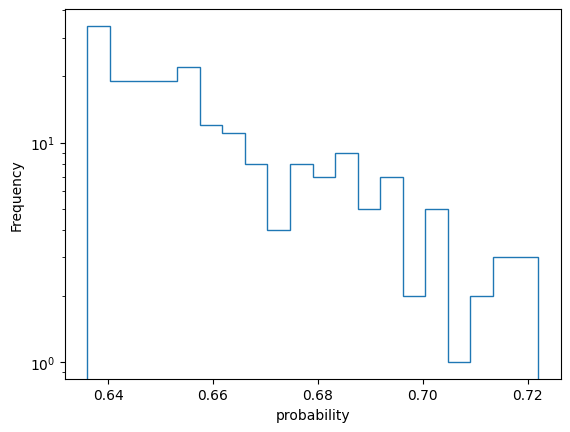

In [25]:
fig, ax = plt.subplots()
query_results = client.query_objects(
    classifier="lc_classifier",
    class_name="SNIa",
    ranking=1,
    page_size=200,
    order_by='probability',
    order_mode='DESC',
    format='pandas')
query_results.probability.plot.hist(bins=20, ax=ax, lw=1, log=True,
                                    histtype='step', label='ranking=1')

ax.set_xlabel("probability");

# Let's now generate a link to look at all the previous objects

In [26]:
def print_link(index=None, classifier='stamp_classifier'):
    if len(index) == 1:
        expr = 'https://alerce.online/object/' + index[0]
    else:
        expr1 = 'https://alerce.online/?oid='
        expr2 = '&oid='.join(list(index))
        expr3 = '&selectedClassifier=' + classifier + '&page=1'
        expr = expr1 + expr2 + expr3
    
    display(HTML("<a href='%s' target=\"_blank\"> %s <a>" % (expr, expr)))

In [27]:
print_link(index=query_results["oid"].iloc[0:200], classifier='stamp_classifier')

Open the link in your browser to see the explore the objects.